# 머신러닝 회귀모델 실습
- Kaggle data : https://www.kaggle.com/mustafaali96/weight-height
- 데이터 컬럼 : Gender, Height, Weight
- 목표(target) : 사람의 키에 따른 몸무게 예측하기
- 학습기(Estimator) : LinearRegression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 데이터 준비

In [60]:
# read weight-height dataset
data = "ml_datas/weight-height.csv"
wh_df = pd.read_csv(data)

In [61]:
wh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### [문제해결] 컬럼 단위를 우리에게 익숙한 값으로 변경하기
- 키 : inch -> cm, 1inch = 2.54cm
- 몸무게 : lb(파운트) -> kg, 1lb = 0.4563kg

In [62]:
# 키 변경하기
wh_df['Height'] = wh_df['Height'] * 2.54

In [63]:
wh_df['Height'] = round(wh_df['Height'], 1)
wh_df

,Gender,Height,Weight
0,Male,187.6,241.893563
1,Male,174.7,162.310473
2,Male,188.2,212.740856
3,Male,182.2,220.042470
4,Male,177.5,206.349801
...,...,...,...
9995,Female,168.1,136.777454
9996,Female,170.4,170.867906
9997,Female,162.2,128.475319
9998,Female,175.3,163.852461


In [64]:
wh_df["Weight"] = round(wh_df["Weight"] * 0.4563, 1)

In [65]:
# wh_df = wh_df.drop(labels="Gender", axis=1)
wh_df.head()

,Gender,Height,Weight
0,Male,187.6,110.4
1,Male,174.7,74.1
2,Male,188.2,97.1
3,Male,182.2,100.4
4,Male,177.5,94.2


In [66]:
wh_df.shape

(10000, 3)

In [67]:
wh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


## [문제해결] 기술 통계량 확인

In [68]:
wh_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573940,73.665610
std,9.772842,14.651178
min,137.800000,29.500000
25%,161.300000,62.000000
50%,168.400000,73.600000
75%,175.700000,85.400000
max,200.700000,123.200000


In [69]:
wh_df['Gender'].describe()

count     10000
unique        2
top        Male
freq       5000
Name: Gender, dtype: object

### [문제해결] x=키, y=몸무게의 관계와 분포 확인

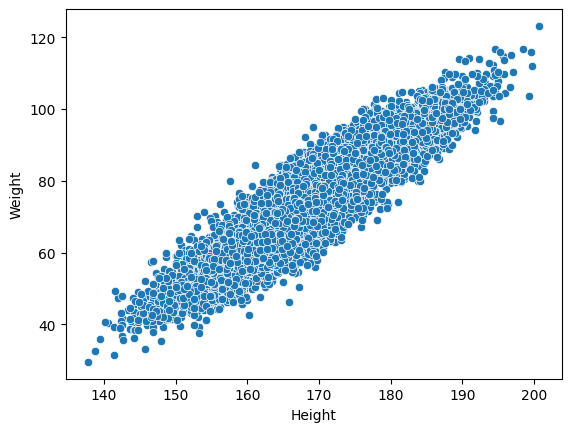

In [70]:
# plt.figure(figsize=(12, 8))
sns.scatterplot(data=wh_df, x = "Height", y="Weight")
plt.show()

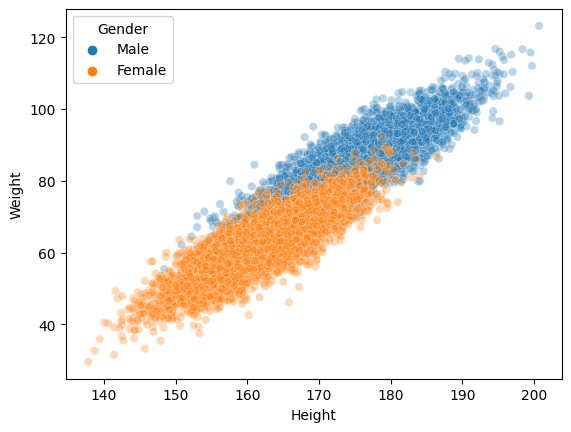

In [91]:
# data 프레임 gender 범주로 구분해서 보기
sns.scatterplot(data=wh_df, x = "Height", y="Weight", hue="Gender", alpha=0.3)
plt.show()

## Feature(X)와 label(y) 데이터 분리

In [71]:
wh_df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [115]:
# 특징 데이터
X = wh_df["Height"]

In [103]:
# 정답 데이터
y =  wh_df["Weight"]

In [116]:
print(X.shape, y.shape)

(10000,) (10000,)


In [105]:
X[:5]

0    187.6
1    174.7
2    188.2
3    182.2
4    177.5
Name: Height, dtype: float64

In [106]:
y[:5]

0    110.4
1     74.1
2     97.1
3    100.4
4     94.2
Name: Weight, dtype: float64

### [문제해결] 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나누기

- random_seed 값 주기
- stratify=y 설정은
    - target이 classification인 경우
    - feature가 2개이상 있을 때 사용

### 학습 데이터 준비
- X(feature, 독립변수) / y(target, 종속변수) 데이터 분리
- 학습 데이터 (train_X, train_y)
- 테스트 데이터(test_X, test_y)

In [134]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=20)

In [135]:
print(train_X, train_y, test_X, test_y)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

4661    175.6
7168    163.2
1031    176.0
6746    157.6
9228    161.5
        ...  
3915    171.8
9620    170.0
7068    164.2
7391    161.3
4367    175.5
Name: Height, Length: 8000, dtype: float64 4661    92.2
7168    65.7
1031    94.4
6746    57.1
9228    55.9
        ... 
3915    81.3
9620    66.1
7068    62.6
7391    63.1
4367    86.8
Name: Weight, Length: 8000, dtype: float64 9957    159.8
1687    187.3
2116    163.4
231     182.8
2780    172.2
        ...  
7176    150.2
5050    165.2
7910    157.4
7023    161.3
2054    165.6
Name: Height, Length: 2000, dtype: float64 9957    65.7
1687    93.1
2116    80.2
231     92.0
2780    75.0
        ... 
7176    47.0
5050    66.2
7910    53.4
7023    62.3
2054    67.2
Name: Weight, Length: 2000, dtype: float64
(8000,) (8000,) (2000,) (2000,)


1차원 shape 결과  
(n,)  
2차원 shape 결과  
(n, 1)  

## 모델 학습하기
- 선형회귀(Linear Regression)

In [109]:
model_lr = LinearRegression()

## 선형회귀(Linear Regression) 모델 학습하기
- reshape 부분을 유의!

### **테스트시 reshape(-1,1)로 차원을 바꿔 주는 이유**
- 학습기는 기본적으로 feature 2개 이상의 input이 들어간다고 가정하고 만들어뒀다.(2차원 array)
- 현재 키(height)만 있음.

#### numpy로 변경하는 방법1

In [122]:
# train_X = np.array(train_X).reshape(-1, 1)

In [123]:
# train_X.shape

(8000, 1)

In [124]:
# model_lr.fit(x_train, y_train)  <-- x_train은 2D 여야함.
# feature은 2차원 행열로 사용해야 함 1차원 사용 불가
# model_lr.fit(train_X, train_y)

LinearRegression()

#### Series를 2차원으로 바꾸는 방법2

In [129]:
# data 프레임을 유지하면서 바꾸는 방법
model_lr.fit(train_X.values.reshape(-1,1), train_y) 

LinearRegression()

In [131]:
train_X[:5]

4661    175.6
7168    163.2
1031    176.0
6746    157.6
9228    161.5
Name: Height, dtype: float64

In [133]:
a = train_X.values.reshape(-1,1)
print(a)

[[175.6]
 [163.2]
 [176. ]
 ...
 [164.2]
 [161.3]
 [175.5]]


#### Series를 바꾸는 방법3

In [141]:
# data 프레임을 유지하면서 바꾸는 방법
# train_X = train_X.to_frame()
print(train_X.shape)
train_X

(8000, 1)


,Height
4661,175.6
7168,163.2
1031,176.0
6746,157.6
9228,161.5
...,...
3915,171.8
9620,170.0
7068,164.2
7391,161.3


In [139]:
model_lr.fit(train_X, train_y)

LinearRegression()

### 일반화 하기
- 임의 데이터 사용해서 예측하기
    - 자신
    - 가족
    - 아는 사람 ...

In [144]:
test_data = [[160]]
model_lr.predict(test_data)

array([61.7938131])

In [145]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

In [146]:
test_data = pd.DataFrame({"Height":[160]})

In [147]:
model_lr.predict(test_data)

array([61.7938131])

## 회귀 모델 성능 평가
- MSE : Mean Squared Error
- RMS : Root Mean Squared Error

In [161]:
y_pred = model_lr.predict(test_X)
y_pred

array([61.51676674, 99.61064064, 66.50360114, ..., 58.19221047,
       63.59461441, 69.55111105])

In [165]:
test_y[:5]

,Weight
9957,65.7
1687,93.1
2116,80.2
231,92.0
2780,75.0


In [168]:
MSE = mean_squared_error(test_y, y_pred)

In [169]:
# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

In [170]:
print('MSE :', MSE)
print('RMSE :', RMSE)

# 결과는 도메인마다 다름

MSE : 30.70120297979126
RMSE : 5.54086662714338


## 예측결과 차트로 표현하기

### [문제해결] matplotlib의 plot() 차트를 활용 결과 차트로 표현하기
- x_test, y_test는 'o' 점으로
- x_test, y_pred는 선으로

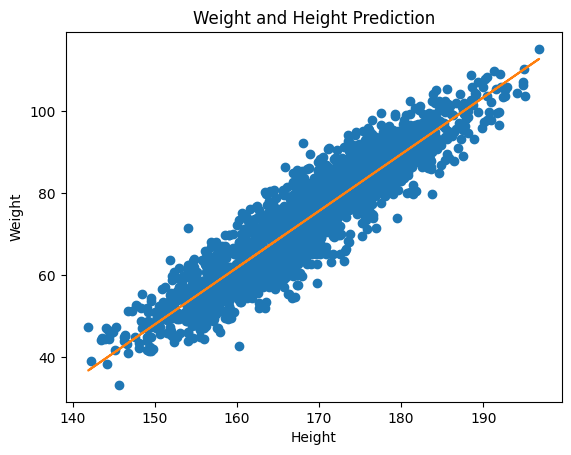

In [176]:
plt.plot(test_X, test_y, "o")
plt.plot(test_X, y_pred)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title('Weight and Height Prediction')
plt.show()